In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
# Load the data
forest_data = pd.read_csv('/Users/yeshwanthsatyadev/Downloads/forestfires (1).csv')

# Display the first few rows and data information
print(forest_data.head())
print(forest_data.info())

# Display summary statistics for numerical columns
print(forest_data.describe())


  month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthfeb  \
0   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...         0   
1   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...         0   
2   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...         0   
3   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...         0   
4   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   monthsep  size_category  
0         0          small  
1         0          small  

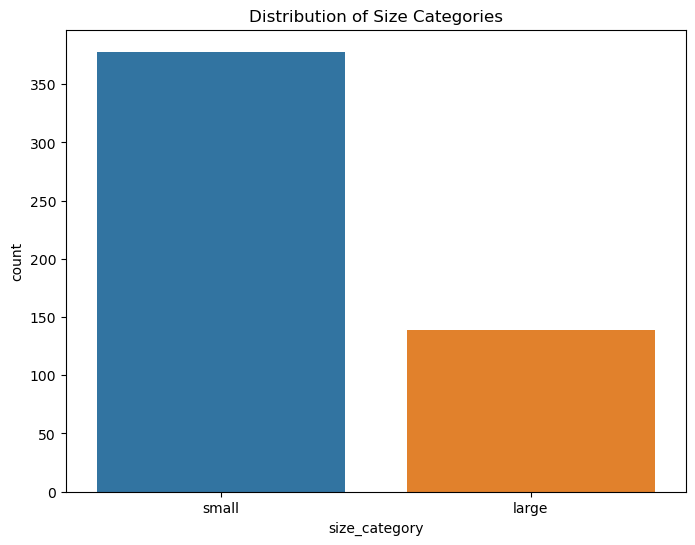

In [3]:
# Visualizations

# Count plot for Size_Categorie
plt.figure(figsize=(8, 6))
sns.countplot(x='size_category', data=forest_data)
plt.title('Distribution of Size Categories')
plt.show()

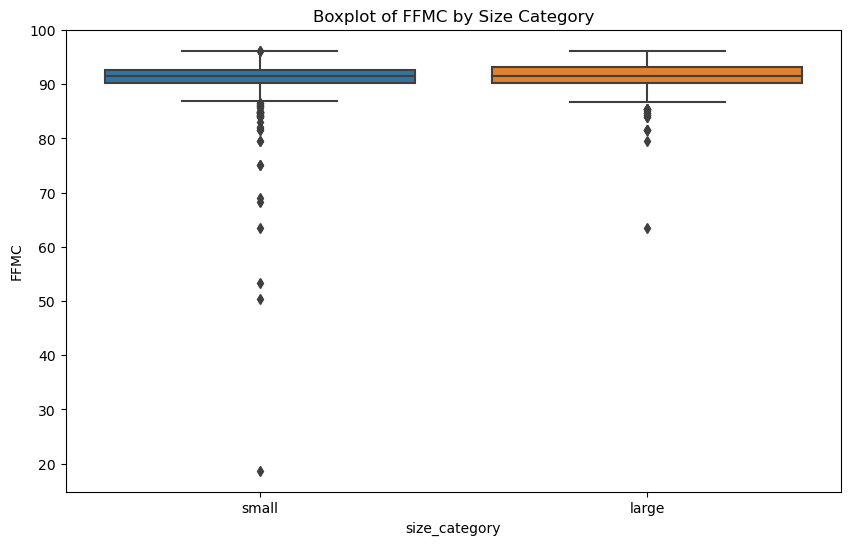

In [4]:
# Boxplot for FFMC index by Size_Categorie
plt.figure(figsize=(10, 6))
sns.boxplot(x='size_category', y='FFMC', data=forest_data)
plt.title('Boxplot of FFMC by Size Category')
plt.show()

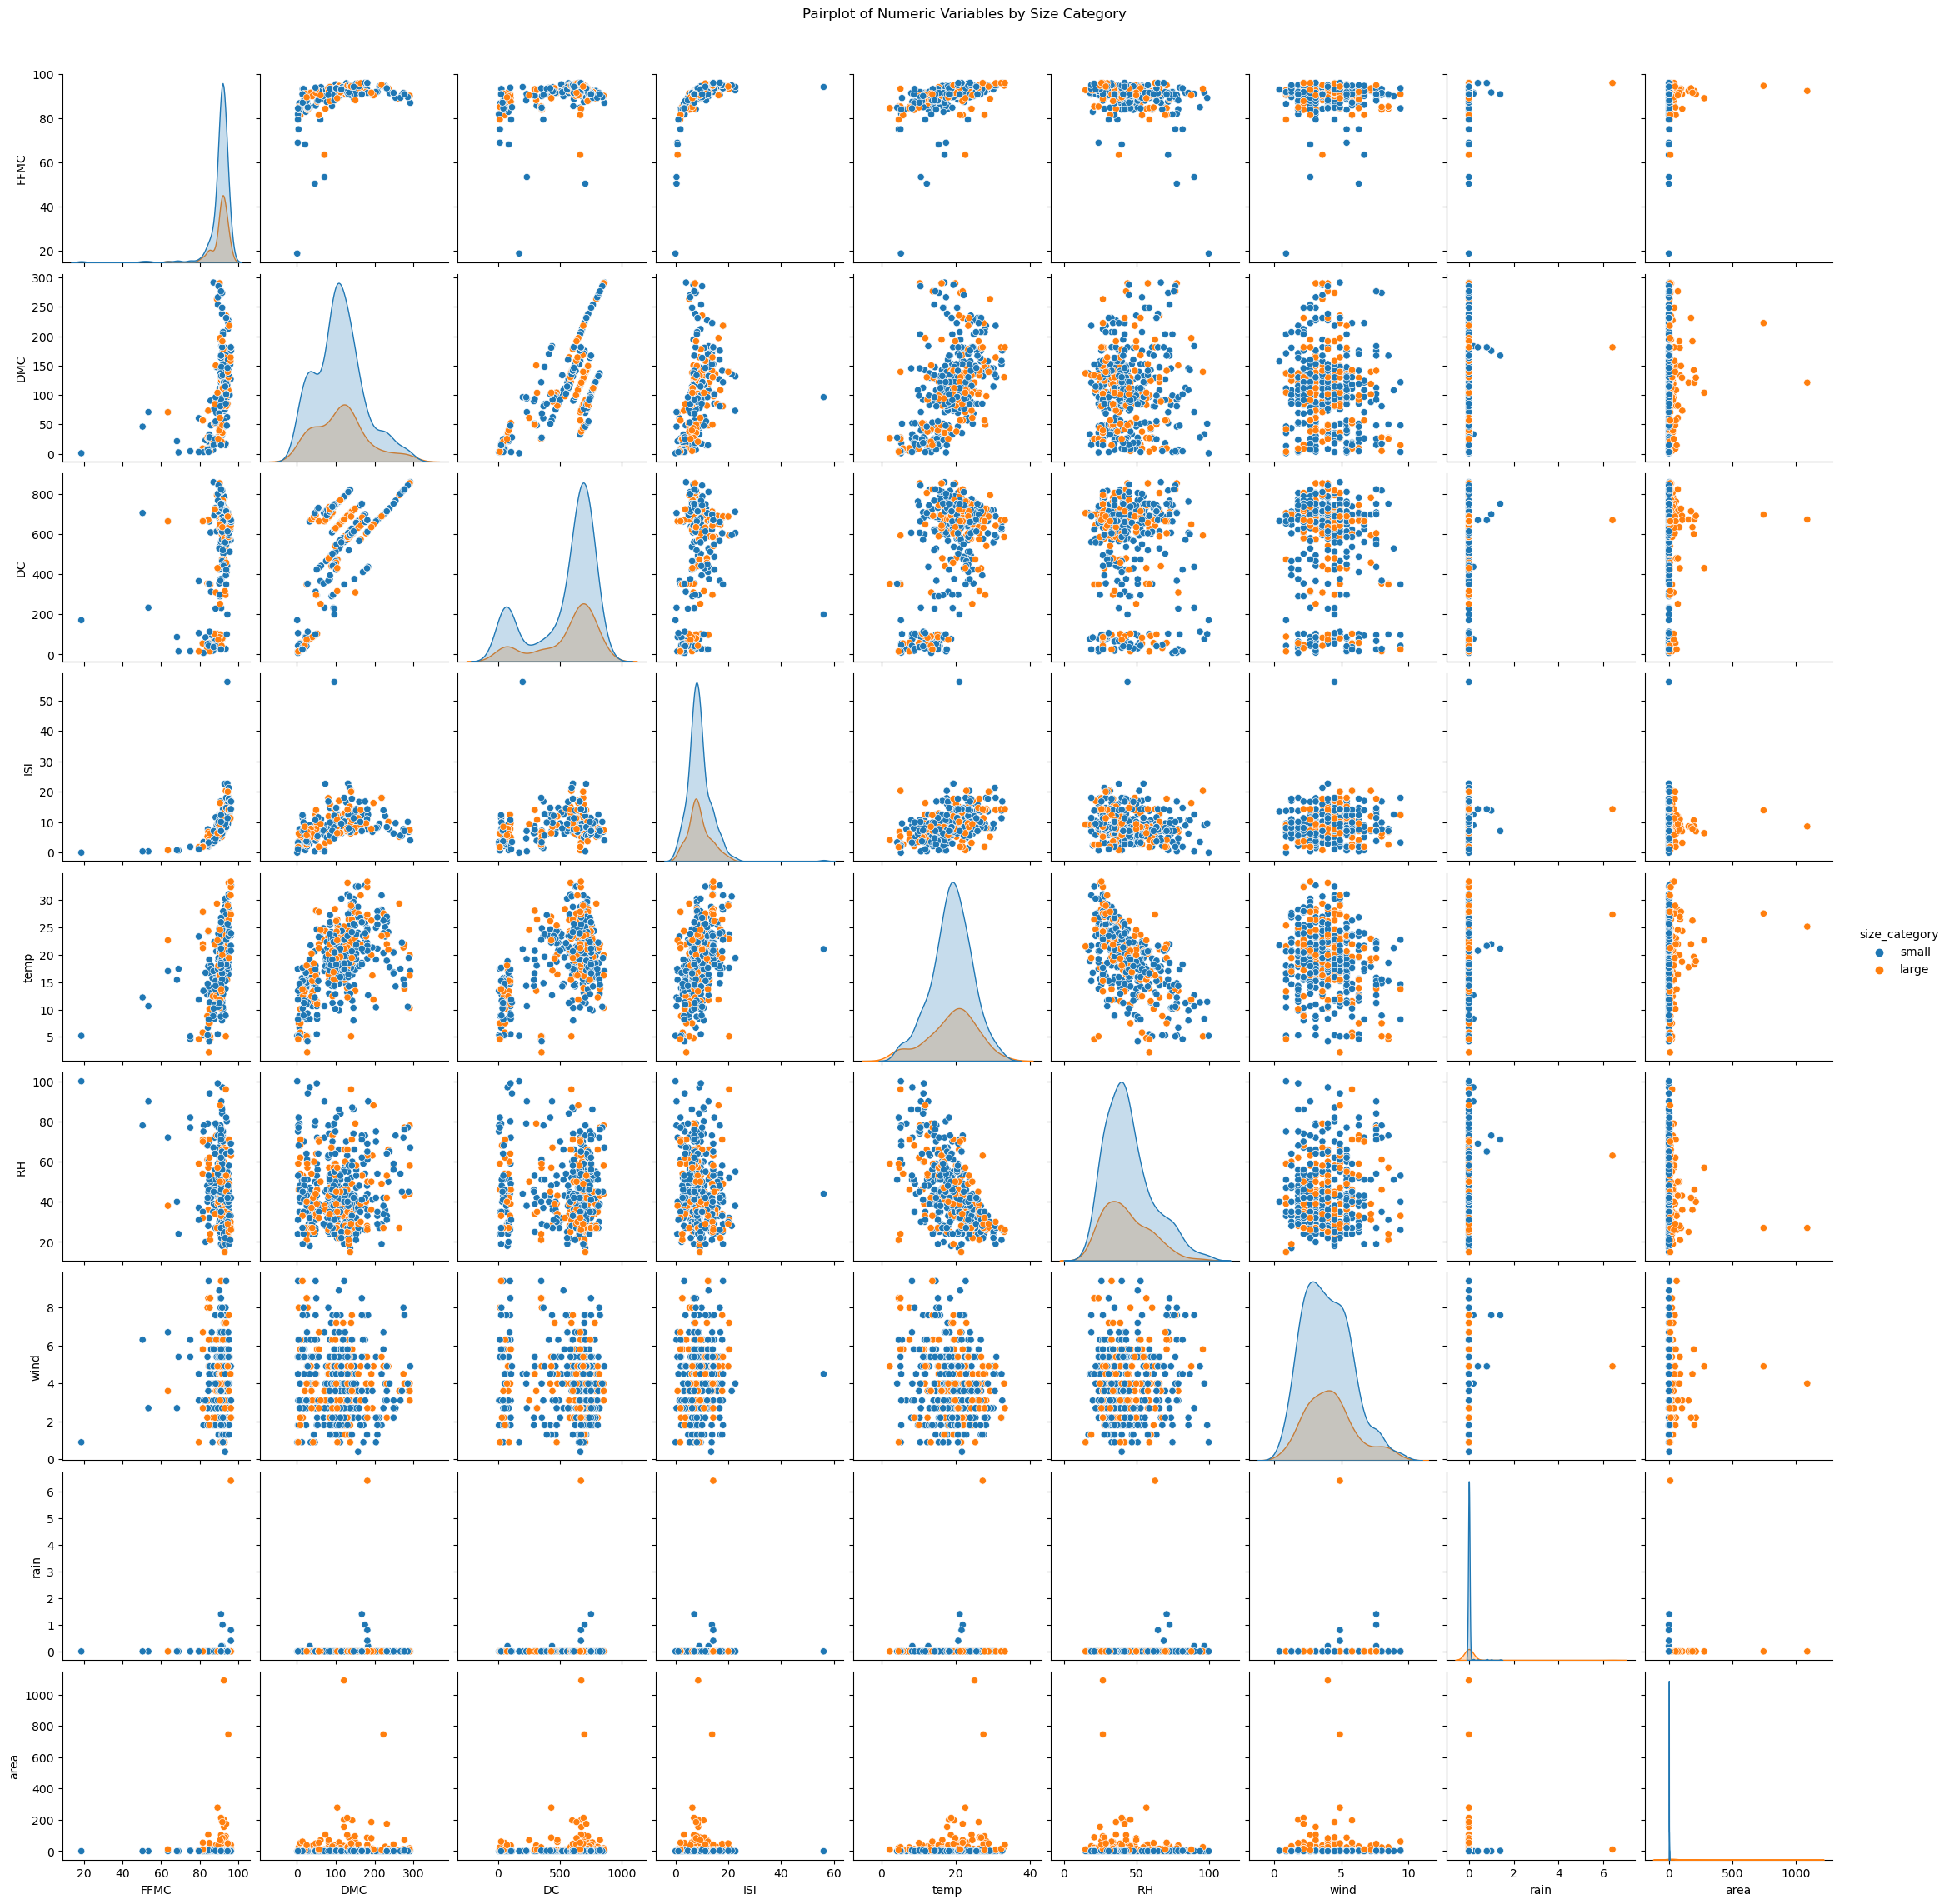

In [5]:
# Pairplot for selected numeric columns
numeric_cols = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']
sns.pairplot(forest_data, vars=numeric_cols, hue='size_category')
plt.suptitle('Pairplot of Numeric Variables by Size Category', y=1.02)
plt.show()

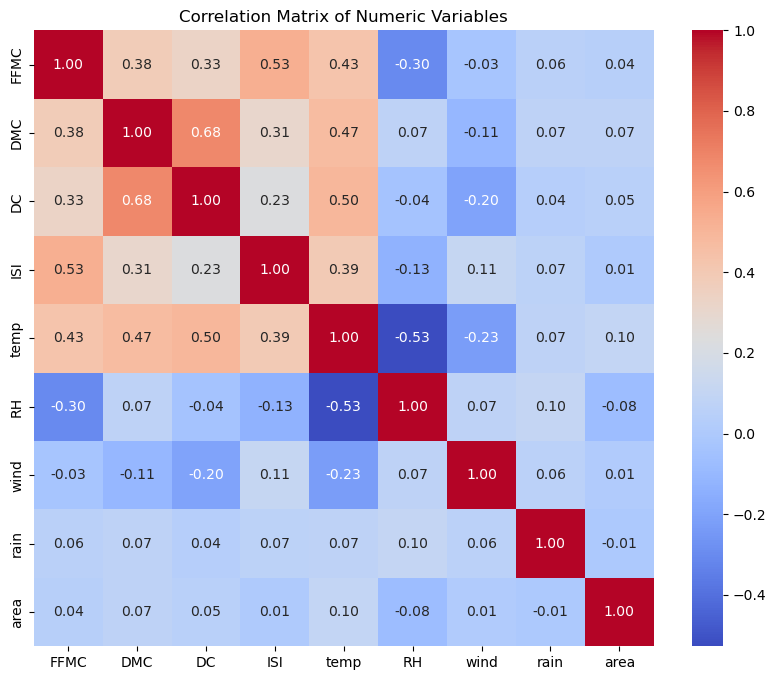

In [6]:
# Correlation matrix
corr_matrix = forest_data[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

In [7]:
# Preprocessing
# Convert categorical variables to numerical using LabelEncoder
label_encoder = LabelEncoder()
forest_data['month'] = label_encoder.fit_transform(forest_data['month'])
forest_data['day'] = label_encoder.fit_transform(forest_data['day'])
forest_data['size_category'] = label_encoder.fit_transform(forest_data['size_category'])

In [8]:
# Separate features and target variable
X = forest_data.drop(['size_category'], axis=1)
y = forest_data['size_category']


In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Feature scaling for better SVM performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Train the SVM model
svm_model = SVC(kernel='linear', C=1)  # You can try different kernels and parameter values
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

In [12]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9230769230769231

Confusion Matrix:
 [[23  5]
 [ 3 73]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85        28
           1       0.94      0.96      0.95        76

    accuracy                           0.92       104
   macro avg       0.91      0.89      0.90       104
weighted avg       0.92      0.92      0.92       104

